## Analyse exploratoire et nettoyage de `tmdb_full`

### Introduction
Les étapes suivantes visent à analyser, nettoyer et préparer la table `tmdb_full` pour une utilisation ultérieure. 
Nous allons examiner chaque colonne, effectuer les transformations nécessaires et proposer des recommandations pour les prochaines étapes.

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

### Étape 1 : Chargement des données

In [51]:
# Importation du DataSet :
df_tmdb = pd.read_csv('../gitignore/tmdb_full.csv')


C:\Users\pierr\AppData\Local\Temp\ipykernel_32740\2694276354.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  df_tmdb = pd.read_csv('../gitignore/tmdb_full.csv')


- #### Traitement de l'avertissement

In [23]:
#Le message d'avertissement précédent nous précise que la colonne d'index 24 contient plusieurs types.
#Nous allons vérifier ce qu'elle contient pour convertir les valeurs en un type unique.
df_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            309572 non-null  int64  
 6   imdb_id                       309572 non-null  object 
 7   original_language             309572 non-null  object 
 8   original_title                309572 non-null  object 
 9   overview                      282512 non-null  object 
 10  popularity                    309572 non-null  float64
 11  poster_path                   264159 non-null  object 
 12  production_countries          309572 non-nul

In [52]:
#Il s'agit de la colonne 'production_companies_name' qui devrait contenir des formats str.
#Nous allons donc refaire l'import de la table en modifiant le type de cette colonne.
df_tmdb = pd.read_csv('../gitignore/tmdb_full.csv', dtype={24:'str'})


- #### Aperçu rapide des données

In [28]:
df_tmdb.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309572 entries, 0 to 309571
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   adult                         309572 non-null  bool   
 1   backdrop_path                 151760 non-null  object 
 2   budget                        309572 non-null  int64  
 3   genres                        309572 non-null  object 
 4   homepage                      44262 non-null   object 
 5   id                            309572 non-null  int64  
 6   imdb_id                       309572 non-null  object 
 7   original_language             309572 non-null  object 
 8   original_title                309572 non-null  object 
 9   overview                      282512 non-null  object 
 10  popularity                    309572 non-null  float64
 11  poster_path                   264159 non-null  object 
 12  production_countries          309572 non-nul

### Étape 2 : Informations générales sur les données

- #### Aperçu rapide des données

In [ ]:
df_tmdb.head()


,adult,backdrop_path,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,production_companies_name,production_companies_country
0,False,/dvQj1GBZAZirz1skEEZyWH2ZqQP.jpg,0,['Comedy'],NaN,3924,tt0029927,en,Blondie,Blondie and Dagwood are about to celebrate the...,...,70,['en'],Released,The favorite comic strip of millions at last o...,Blondie,False,7.214,7,['Columbia Pictures'],['US']
1,False,NaN,0,['Adventure'],NaN,6124,tt0011436,de,Der Mann ohne Namen,NaN,...,420,[],Released,NaN,"Peter Voss, Thief of Millions",False,0.000,0,[],[]
2,False,/uJlc4aNPF3Y8yAqahJTKBwgwPVW.jpg,0,"['Drama', 'Romance']",NaN,8773,tt0055747,fr,L'Amour à vingt ans,Love at Twenty unites five directors from five...,...,110,"['it', 'ja', 'pl', 'fr', 'de']",Released,The Intimate Secrets of Young Lovers,Love at Twenty,False,6.700,41,"['Ulysse Productions', 'Unitec Films', 'Cinese...","['', 'NZ', 'IT', 'JP', 'DE', 'PL', '']"
3,False,/hQ4pYsIbP22TMXOUdSfC2mjWrO0.jpg,0,"['Drama', 'Comedy', 'Crime']",NaN,2,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,...,73,['fi'],Released,NaN,Ariel,False,7.046,248,['Villealfa Filmproductions'],['FI']
4,False,/l94l89eMmFKh7na2a1u5q67VgNx.jpg,0,"['Drama', 'Comedy', 'Romance']",NaN,3,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",...,76,['en'],Released,NaN,Shadows in Paradise,False,7.182,269,['Villealfa Filmproductions'],['FI']


- #### Identification des valeurs manquantes

In [ ]:
df_tmdb.isna().sum()


adult                                0
backdrop_path                   157812
budget                               0
genres                               0
homepage                        265310
id                                   0
imdb_id                              0
original_language                    0
original_title                       0
overview                         27060
popularity                           0
poster_path                      45413
production_countries                 0
release_date                      8233
revenue                              0
runtime                              0
spoken_languages                     0
status                               0
tagline                         234999
title                                0
video                                0
vote_average                         0
vote_count                           0
production_companies_name            0
production_companies_country    145134
dtype: int64

- #### Identification des doublons

In [33]:
df_tmdb['imdb_id'].duplicated().sum()

0

- #### Identification des films pour adultes

In [37]:
df_tmdb['adult'].value_counts()


adult
False    309571
True          1
Name: count, dtype: int64

In [53]:
df_tmdb = df_tmdb[df_tmdb['adult'] != True]


In [41]:
df_tmdb['adult'].value_counts()


adult
False    309571
Name: count, dtype: int64

- #### Conversion des colonnes `release_date`

In [63]:
#On transforme les dates au format datetime et on extrait l'année (les valeurs nulles sont remplacées par 0)
df_tmdb['release_date'] = df_tmdb['release_date'].apply(lambda date: pd.to_datetime(date))
df_tmdb['release_date'] = df_tmdb['release_date'].dt.year.fillna(0).astype(int)


### Étape 3 : Nettoyage des colonnes `genres`, `spoken_languages` et `production_countries`

In [66]:
#Explode de la colonne 'genres' après l'avoir transformée en liste
df_tmdb['genres'] = df_tmdb['genres'].apply(lambda genre: eval(genre))
df_tmdb = df_tmdb.explode('genres')


In [67]:
df_tmdb2 = df_tmdb.copy()


In [47]:
#Explode de la colonne 'spoken_languages' après l'avoir transformée en liste
df_tmdb2['spoken_languages'] = df_tmdb2['spoken_languages'].apply(lambda genre: eval(genre))
df_tmdb2 = df_tmdb2.explode('spoken_languages')


In [48]:
#Explode de la colonne 'production_countries' après l'avoir transformée en liste
df_tmdb2['production_countries'] = df_tmdb2['production_countries'].apply(lambda genre: eval(genre))
df_tmdb2 = df_tmdb2.explode('production_countries')


### Étape 4 : Exploration et analyse graphique

In [ ]:
df_tmdb.describe()


,budget,id,popularity,release_date,revenue,runtime,vote_average,vote_count
count,5.127570e+05,5.127570e+05,512757.000000,512757.000000,5.127570e+05,512757.000000,512757.000000,512757.000000
mean,1.533731e+06,3.791969e+05,3.650852,1951.312694,3.998864e+06,75.692677,4.430972,105.899949
std,1.138247e+07,3.167646e+05,29.527697,291.853013,4.179893e+07,99.137127,2.872604,779.741167
min,0.000000e+00,2.000000e+00,0.600000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,1.026640e+05,0.661000,1978.000000,0.000000e+00,50.000000,1.000000,1.000000
50%,0.000000e+00,2.977520e+05,1.303000,2004.000000,0.000000e+00,88.000000,5.400000,3.000000
75%,0.000000e+00,5.786790e+05,2.688000,2015.000000,0.000000e+00,100.000000,6.500000,14.000000
max,5.793304e+08,1.122427e+06,5089.969000,2028.000000,2.923706e+09,43200.000000,10.000000,33630.000000


In [ ]:
#On crée une variable des genres les plus représentés pour nos analyses visuelles.
max_genres = df_tmdb['genres'].value_counts().head(10)


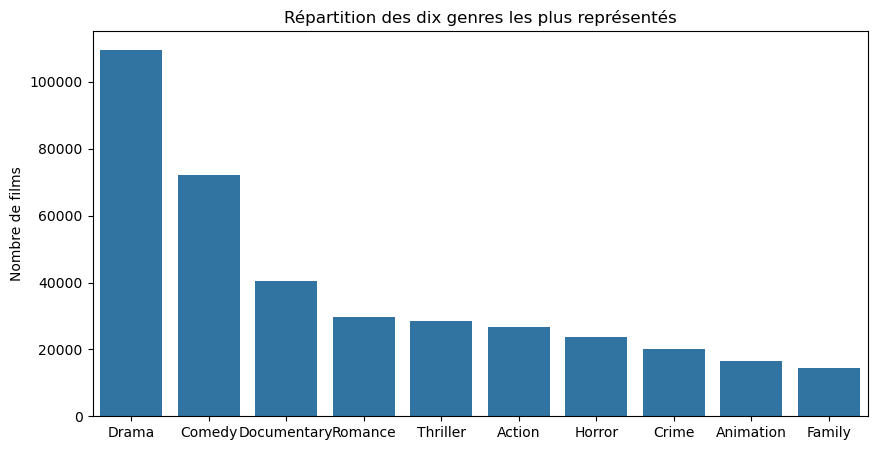

In [89]:
plt.figure(figsize=(10, 5))
sns.barplot(x=max_genres.index, y=max_genres.values)
plt.title("Répartition des dix genres les plus représentés")
plt.xlabel("")
plt.ylabel("Nombre de films")
plt.show()

In [108]:
#Moyenne des durées de films par genre:

duree_moyenne_genres = df_tmdb.groupby('genres')['runtime'].mean()
duree_mediane_genres = df_tmdb.groupby('genres')['runtime'].median()


In [118]:
df_duree = pd.DataFrame({})
df_duree['moyenne']=df_tmdb.groupby('genres')['runtime'].mean()
df_duree['mediane']=df_tmdb.groupby('genres')['runtime'].median()
df_duree = df_duree.reset_index()
df_duree.head()

,genres,moyenne,mediane
0,Action,91.648612,93.0
1,Adventure,83.323009,90.0
2,Animation,34.764514,12.0
3,Comedy,72.359778,87.0
4,Crime,85.624072,91.0


In [ ]:
plt.figure(figsize=(20, 5))
ax1 = sns.barplot(df_duree, x='genres', y=)
plt.title("Moyenne et médiane des durées de films par genres")
plt.xlabel("")
plt.ylabel("Durée (en min)")
plt.show()

ValueError: Length of list vectors must match length of `data` when both are used, but `data` has length 19 and the vector passed to `y` has length 1.

<Figure size 2000x500 with 0 Axes>

In [91]:
#Note moyenne des films par genre:
df_tmdb.groupby('genres')['vote_average'].mean()

genres
Action             4.690799
Adventure          4.902280
Animation          4.955057
Comedy             4.562074
Crime              4.720948
Documentary        4.279540
Drama              4.451121
Family             5.123360
Fantasy            4.828169
History            5.020793
Horror             4.126790
Music              4.776853
Mystery            4.923906
Romance            4.787447
Science Fiction    4.515883
TV Movie           4.794360
Thriller           4.720657
War                5.050449
Western            3.867103
Name: vote_average, dtype: float64

In [72]:
#Nombre de votants moyen par genre:
df_tmdb.groupby('genres')['vote_count'].mean()

genres
Action             231.024201
Adventure          385.531045
Animation          120.084068
Comedy              86.054704
Crime              140.796131
Documentary          7.967847
Drama               72.688875
Family             177.735714
Fantasy            284.670856
History            101.643533
Horror              93.831561
Music               37.313523
Mystery            165.340959
Romance             93.607737
Science Fiction    316.413011
TV Movie            17.383988
Thriller           177.124885
War                113.692011
Western             51.926248
Name: vote_count, dtype: float64

In [ ]:
df_tmdb2.to_csv('../gitignore/tmdb_final.csv', sep= ',', index = False)